[2.99494310e-02 5.99288114e-02 8.99387702e-02 1.19979938e-01
 1.50052945e-01 1.80158425e-01 2.10297011e-01 2.40469339e-01
 2.70676046e-01 3.00917768e-01 3.31195146e-01 3.61508820e-01
 3.91859431e-01 4.22247623e-01 4.52674040e-01 4.83139328e-01
 5.13644136e-01 5.44189111e-01 5.74774904e-01 6.05402166e-01
 6.36071551e-01 6.66783714e-01 6.97539310e-01 7.28338997e-01
 7.59183435e-01 7.90073285e-01 8.21009207e-01 8.51991867e-01
 8.83021930e-01 9.14100063e-01 9.45226934e-01 9.76403215e-01
 1.00762958e+00 1.03890669e+00 1.07023524e+00 1.10161589e+00
 1.13304933e+00 1.16453623e+00 1.19607728e+00 1.22767316e+00
 1.25932456e+00 1.29103217e+00 1.32279667e+00 1.35461875e+00
 1.38649911e+00 1.41843845e+00 1.45043745e+00 1.48249682e+00
 1.51461726e+00 1.54679947e+00 1.57904416e+00 1.61135203e+00
 1.64372378e+00 1.67616013e+00 1.70866180e+00 1.74122949e+00
 1.77386392e+00 1.80656581e+00 1.83933587e+00 1.87217484e+00
 1.90508344e+00 1.93806239e+00 1.97111241e+00 2.00423425e+00
 2.03742864e+00 2.070696

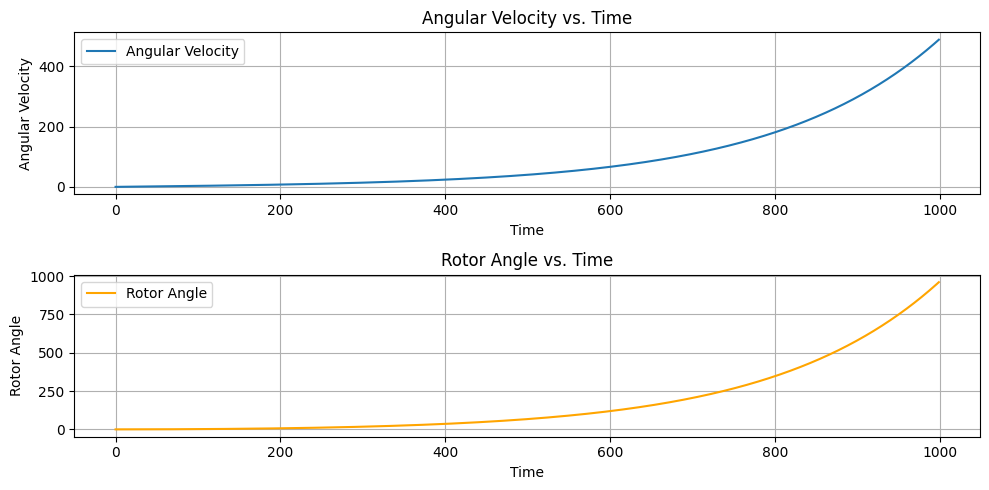

In [6]:
import numpy as np
from matplotlib import pyplot as plt


def swing_equation(omega, theta, c1, c2, P0, P1, epsilon, xi):
    """
    Swing equation model.
    
    Parameters:
        omega (float): Angular velocity.
        theta (float): Rotor angle.
        c1 (float): Coefficient.
        c2 (float): Coefficient.
        P0 (float): Constant power input.
        P1 (float): Variable power input.
        epsilon (float): Parameter.
        xi (float): Random variable.
        
    Returns:
        domega_dt (float): Change in angular velocity.
        dtheta_dt (float): Change in rotor angle.
    """
    domega_dt = c1 * omega + c2 * theta + P0 + P1 + epsilon * xi
    dtheta_dt = omega
    return domega_dt, dtheta_dt

def euler_maruyama_integration(omega0, theta0, c1, c2, P0, P1, epsilon, xi, dt, num_steps):
    """
    Perform Euler-Maruyama integration for the swing equation.
    
    Parameters:
        omega0 (float): Initial angular velocity.
        theta0 (float): Initial rotor angle.
        c1 (float): Coefficient.
        c2 (float): Coefficient.
        P0 (float): Constant power input.
        P1 (float): Variable power input.
        epsilon (float): Parameter.
        xi (float): Random variable.
        dt (float): Time step size.
        num_steps (int): Number of steps to integrate.
        
    Returns:
        omegas (ndarray): Array of angular velocities over time.
        thetas (ndarray): Array of rotor angles over time.
    """
    omegas = np.zeros(num_steps)
    thetas = np.zeros(num_steps)
    
    omega = omega0
    theta = theta0
    
    for i in range(num_steps):
        domega_dt, dtheta_dt = swing_equation(omega, theta, c1, c2, P0, P1, epsilon, xi)
        omega += domega_dt * dt
        theta += dtheta_dt * dt
        omegas[i] = omega
        thetas[i] = theta
        
    return omegas, thetas

# Parameters
omega0 = 0.0
theta0 = 0.0
c1 = 0.1
c2 = 0.2
P0 = 1.0
P1 = 2.0
epsilon = 0.01
xi = np.random.normal(0, 1)  # Random variable
dt = 0.01  # Time step size
num_steps = 1000  # Number of steps to integrate

# Perform Euler-Maruyama integration
omegas, thetas = euler_maruyama_integration(omega0, theta0, c1, c2, P0, P1, epsilon, xi, dt, num_steps)

print(omegas)
print("\n")
print("\n")
print("\n")
print("\n")
print("\n")
print(thetas)
# Plotting
plt.figure(figsize=(10, 5))

plt.subplot(2, 1, 1)
plt.plot(omegas, label='Angular Velocity')
plt.xlabel('Time')
plt.ylabel('Angular Velocity')
plt.title('Angular Velocity vs. Time')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(thetas, label='Rotor Angle', color='orange')
plt.xlabel('Time')
plt.ylabel('Rotor Angle')
plt.title('Rotor Angle vs. Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


In [42]:
import matplotlib.pyplot as plt
import numpy as np 
import torch
import imageio
import seaborn as sns
import os

from PIL import Image
from IPython.display import clear_output

from sbi.inference import SNPE, prepare_for_sbi, infer
from sbi.utils.get_nn_models import posterior_nn
from sbi.utils import BoxUniform

from simulators.simulator_functions import swing_equation

In [43]:
# Define the prior distribution over the parameters H and D
# Use a uniform distribution with lower and upper bounds
prior = BoxUniform(low=torch.tensor([0.0, 0.0, 0.0, 0.0]), high=torch.tensor([10.0, 10.0, 10.0, 10.0]))

# Define the true parameters for the simulator
theta_true = torch.tensor([0.2, 0.2, 0.2, 0.2])

# Generate observed data using the simulator and true parameters
x_0 = swing_equation(theta_true, T=10)

how does the simulation look with true value of theta?

In [74]:
def plot_simulation(swing_equation, theta, dt=0.01, T=10, labels=None):
    # Create a directory for the temporary images
    os.makedirs('temp_images', exist_ok=True)

    # Run the simulation
    simulation = swing_equation(theta, dt, T)

    # Define the number of frames for the GIF
    num_frames = 100

    # Calculate the number of simulation steps per frame
    steps_per_frame = len(simulation) // num_frames

    # Determine the fixed limits for the y-axis
    y_min = simulation.min()
    y_max = simulation.max()

    images = []
    for j in range(num_frames):
        # Get the data up to the current frame
        data = simulation[:steps_per_frame*(j+1)]

        # Create the plot
        fig, ax = plt.subplots(figsize=(4,4))
        ax.plot(np.arange(steps_per_frame*(j+1))*dt, data, label='Simulation')  # Make the line thinner

        # Set the fixed limits for the x and y axes
        ax.set_xlim(0, T)
        ax.set_ylim(y_min, y_max)

        # Label the axes
        ax.set_xlabel('Time (s)')
        ax.set_ylabel('Frequency Change (Hz)')

        # Save the plot as a PNG image in the temporary directory
        filename = f'temp_images/simulation_{j+1}.png'
        plt.savefig(filename, format="png", bbox_inches="tight", dpi=300)  # Increase the resolution
        plt.close()

        images.append(filename)

    # Create the GIF
    gif_filename = 'simulation.gif'
    with imageio.get_writer(gif_filename, mode='I') as writer:
        for filename in images:
            image = Image.open(filename)
            writer.append_data(np.array(image))

    # Remove the temporary image files and directory
    for filename in images:
        os.remove(filename)
    os.rmdir('temp_images')


In [75]:
plot_simulation(swing_equation, theta_true)

In [46]:
# Bereiten Sie Ihren Simulator und Ihre Prior-Verteilung vor
simulator, prior = prepare_for_sbi(swing_equation, prior)

In [47]:
# Erstellen Sie den Inferenzalgorithmus
inference = SNPE(prior=prior)

In [77]:
# Führen Sie die Inferenz durch
posteriors = []
runs = 40

for i in range(runs):
    clear_output(wait=True)
    print(f"\n starting run {i+1}/{runs}")
    theta, x = prior.sample((100,)), simulator(prior.sample((100,)))
    density_estimator = inference.append_simulations(theta, x).train(force_first_round_loss=True)
    posterior = inference.build_posterior(density_estimator)
    posterior.set_default_x(x_0)
    posteriors.append(posterior) 




 starting run 35/40
 Training neural network. Epochs trained: 3

frage: was passiert unterschiedlich wenn ich zum schluss wiederholt neue inferenz starte, wie haben die verteilungen die ich nutze zum samplen einfluss, also entweder ursprüngliche prior oder die letzte posterior?

In [69]:
def plot_prior_posterior(prior, posteriors, labels, theta_true=None):

    for i in range(len(labels)):

        # Create a directory for the temporary images
        os.makedirs('temp_images', exist_ok=True)

        images = []

        for j, posterior in enumerate(posteriors):
            fig, ax = plt.subplots(figsize=(4,4))

            prior_samples = prior.sample((10000,))[:,i]
            posterior_samples = posterior.sample((10000,))[:,i]

            sns.kdeplot(prior_samples, ax=ax, fill=True, label='prior', color='blue')  
            sns.kdeplot(posterior_samples, ax=ax, fill=True, label='posterior', color='orange')

            ax.set_xlabel(labels[i])
            if theta_true is not None:
                ax.axvline(theta_true[i], color='red', label='$\Theta_{true}$')

            # Set the fixed limits for the x and y axes
            ax.set_xlim(-5, 15)
            ax.set_ylim(0, 0.3)

            ax.legend()
            ax.set_ylabel('Density')

            filename = f'temp_images/{labels[i]}_posterior_{j+1}.png'
            plt.savefig(filename, format="png", bbox_inches="tight", dpi=100)
            plt.close()

            images.append(filename)

        gif_filename = f'{labels[i]}_posteriors.gif'
        with imageio.get_writer(gif_filename, mode='I') as writer:
            for filename in images:
                image = Image.open(filename)
                writer.append_data(np.array(image))

        for filename in images:
            os.remove(filename)
        os.rmdir('temp_images')

In [70]:
plot_prior_posterior(prior, posteriors, ["c_1", "c_2", "P_const", "epsilon"])


Drawing 10000 posterior samples: 10619it [00:00, 27736.68it/s]                          


Drawing 10000 posterior samples: 10756it [00:00, 25880.23it/s]                          


Drawing 10000 posterior samples: 10759it [00:00, 26027.81it/s]                          


Drawing 10000 posterior samples: 10745it [00:00, 25299.83it/s]                          


Drawing 10000 posterior samples: 10786it [00:00, 25227.61it/s]                          


Drawing 10000 posterior samples: 10454it [00:00, 28588.38it/s]                          



Drawing 10000 posterior samples: 10993it [00:00, 25559.51it/s]


Drawing 10000 posterior samples: 10601it [00:00, 27980.59it/s]                          



Drawing 10000 posterior samples: 10989it [00:00, 23479.76it/s]
Drawing 10000 posterior samples:   0%|          | 0/10000 [05:10<?, ?it/s]
Drawing 10000 posterior samples: 10764it [00:00, 24240.08it/s]                          
Drawing 10000 posterior samples: 10799it [00:00, 24743.39it/s]      

In [53]:
# Führen Sie die Inferenz durch
posteriors = []
current = prior
runs = 40

for i in range(runs):
    clear_output(wait=True)
    print(f"\n starting run {i+1}/{runs}")
    theta, x = current.sample((100,)), simulator(current.sample((100,)))
    density_estimator = inference.append_simulations(theta, x).train()
    next = inference.build_posterior(density_estimator)
    next.set_default_x(x_0)
    current = posterior
    posteriors.append(next) 


 starting run 40/40


Drawing 100 posterior samples: 162it [00:00, 7800.13it/s]             
Drawing 100 posterior samples: 152it [00:00, 5476.30it/s]             


 Neural network successfully converged after 21 epochs.

In [54]:
plot_prior_posterior(prior, posteriors, ["c_1", "c_2", "P_const", "epsilon"])

Drawing 10000 posterior samples: 10636it [00:00, 26270.00it/s]                          
Drawing 10000 posterior samples: 10790it [00:00, 25570.13it/s]                          
Drawing 10000 posterior samples: 10774it [00:00, 24399.62it/s]                          
Drawing 10000 posterior samples: 10780it [00:00, 25564.86it/s]                          
Drawing 10000 posterior samples: 10872it [00:00, 24939.55it/s]                          
Drawing 10000 posterior samples: 10489it [00:00, 25327.10it/s]                          
Drawing 10000 posterior samples: 10921it [00:00, 22886.53it/s]                          
Drawing 10000 posterior samples: 10601it [00:00, 25614.61it/s]                          
Drawing 10000 posterior samples: 10966it [00:00, 24436.27it/s]                          
Drawing 10000 posterior samples: 10700it [00:00, 25217.78it/s]                          
Drawing 10000 posterior samples: 10783it [00:00, 24850.85it/s]                          
Drawing 10000 posteri